# Name : Manish Sahani


# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

> Interactive visualization libraries

In [2]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode,download_plotlyjs,plot,iplot 

In [3]:
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

> Avoid warnings

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

# Importing the Data

In [5]:
df=pd.read_csv('covid_19_data (1).csv')

In [6]:
df.head(2)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,1/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0


> Converting String into Date dtype

In [7]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8509 entries, 0 to 8508
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              8509 non-null   int64         
 1   ObservationDate  8509 non-null   datetime64[ns]
 2   Province/State   4761 non-null   object        
 3   Country/Region   8509 non-null   object        
 4   Last Update      8509 non-null   object        
 5   Confirmed        8509 non-null   int64         
 6   Deaths           8509 non-null   int64         
 7   Recovered        8509 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 531.9+ KB


In [9]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,8509.000000,8509.000000,8509.000000,8509.000000
mean,4255.000000,704.421201,25.542955,245.788342
std,2456.481054,5111.664699,252.402842,2774.093868
min,1.000000,0.000000,0.000000,0.000000
25%,2128.000000,2.000000,0.000000,0.000000
50%,4255.000000,18.000000,0.000000,0.000000
75%,6382.000000,140.000000,1.000000,10.000000
max,8509.000000,69176.000000,6820.000000,60324.000000


In [10]:
df.shape

(8509, 8)

In [11]:
np.sum(df.isnull())

SNo                   0
ObservationDate       0
Province/State     3748
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

# Null Values

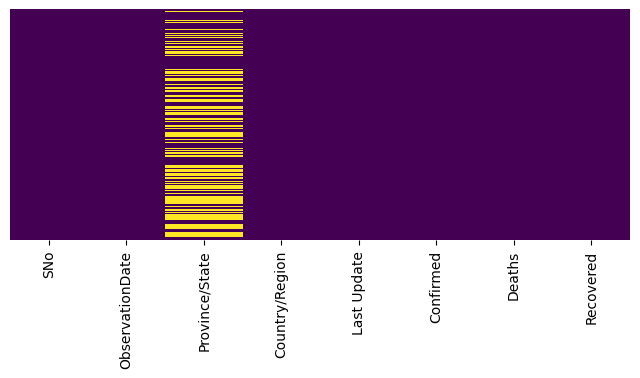

In [12]:
plt.figure(figsize=(8,3),dpi=100)
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False);

> Fixing te null values according to the country column

In [13]:
df[df['Province/State'].isnull()==True]['Country/Region'].value_counts().head(30)

Japan                   63
South Korea             63
Thailand                63
Singapore               62
Vietnam                 62
Malaysia                61
Nepal                   60
Cambodia                58
Sri Lanka               58
Finland                 56
Philippines             56
United Arab Emirates    56
India                   55
Sweden                  54
Russia                  54
Italy                   54
Spain                   53
Germany                 53
Belgium                 50
France                  49
UK                      43
Egypt                   40
Iran                    35
Lebanon                 32
Kuwait                  30
Oman                    30
Afghanistan             30
Bahrain                 30
Iraq                    30
Algeria                 29
Name: Country/Region, dtype: int64

> Applying function

In [14]:
def fillnull(cols):
    state=cols[0]
    country=cols[1]
    if pd.isnull(state):
        return country
    else: 
        return state

In [15]:
df['Province/State']=df[['Province/State','Country/Region']].apply(fillnull,axis=1)

In [16]:
df.head(2 )

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14,0,0


In [17]:
df[['Deaths','Recovered']]

,Deaths,Recovered
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
8504,0,0
8505,0,0
8506,3,73
8507,2,172


# EDA (Exploratory Data Analysis)

In [18]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0,0,0
...,...,...,...,...,...,...,...,...
8504,8505,2020-03-24,Wuhan Evacuee,US,3/24/2020 23:41,4,0,0
8505,8506,2020-03-24,Wyoming,US,3/24/2020 23:41,29,0,0
8506,8507,2020-03-24,Xinjiang,Mainland China,3/24/2020 23:41,76,3,73
8507,8508,2020-03-24,Yunnan,Mainland China,3/24/2020 23:41,176,2,172


In [19]:
# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

In [20]:
df[['ObservationDate','Deaths', 'Recovered', 'Confirmed']]

,ObservationDate,Deaths,Recovered,Confirmed
0,2020-01-22,0,0,1
1,2020-01-22,0,0,14
2,2020-01-22,0,0,6
3,2020-01-22,0,0,1
4,2020-01-22,0,0,0
...,...,...,...,...
8504,2020-03-24,0,0,4
8505,2020-03-24,0,0,29
8506,2020-03-24,3,73,76
8507,2020-03-24,2,172,176


# EDA (Exploaratory Data Analysis)

> Confirmed Cases + Recoverd Cases + Death Cases

In [21]:
temp = df[['ObservationDate','Deaths', 'Recovered', 'Confirmed']]
temp = temp.melt(id_vars='ObservationDate', value_vars=['Confirmed','Recovered','Deaths'])
fig = px.treemap(temp, path=["variable"], values="value", height=225, 
                 color_discrete_sequence=[act, rec, dth])
fig.data[0].textinfo = 'label+text+value'fig.show()

## Gegrophical Maps

> GroupBy According to Countrry to get the Confirmed Cases in gegrophical Map

In [22]:
Country_wise=df.groupby('Country/Region').sum()

In [23]:
Country_wise.reset_index(inplace=True)

In [24]:
def plot_map(df, col, pal):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="Country/Region", locationmode='country names', 
                  color=col, hover_name="Country/Region", 
                  title=col+' Cases According To the Country in 2019', hover_data=[col], color_continuous_scale=pal)
#     fig.update_layout(coloraxis_showscale=False)
    fig.show()

#### Confirmed Cases Map

In [25]:
plot_map(Country_wise, 'Confirmed', 'matter')

#### Death Cases Map

In [26]:
plot_map(Country_wise, 'Deaths', 'matter')

#### Recovered Cases Map

In [27]:
plot_map(Country_wise,'Recovered','matter')

# Cases Over Time

> Timestamp Animation of Cases found according to Time in particular country

In [28]:
fig = px.choropleth(df, locations="Country/Region", 
                    color=np.log(df["Confirmed"]),
                    locationmode='country names', hover_name="Country/Region", 
                    animation_frame=df["ObservationDate"].dt.strftime('%m-%d-%Y'),
                    title='Cases over time', color_continuous_scale=px.colors.sequential.matter)
fig.update(layout_coloraxis_showscale=False)
fig.show()

> Area Plots According to the Time

In [29]:
def plot_daywise(col, hue):
    fig = px.bar(df, x="ObservationDate", y=col, width=700, color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

In [30]:
def plot_daywise_line(col, hue):
    fig = px.line(day_wise, x="Date", y=col, width=700, color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

In [31]:
temp = df.groupby('ObservationDate')['Confirmed','Recovered', 'Deaths'].sum().reset_index()
temp = temp.melt(id_vars="ObservationDate", value_vars=['Confirmed','Recovered', 'Deaths'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="ObservationDate", y="Count", color='Case', height=600, width=700,
             title='Cases over time (Area Plot)', color_discrete_sequence = [rec, dth, act])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

> Daywise Occurence of Confirmed Cases

In [32]:
plot_daywise('Confirmed', 'orange')

> Daywise Occurence of Recovered Cases

In [33]:
plot_daywise('Recovered', 'green')

> Daywise Occurence of Death Cases

In [34]:
plot_daywise('Deaths', 'red')

# Top 15 Countries

In [35]:
def plot_hbar(df, col, n, hover_data=[]):
    fig = px.bar(df.sort_values(col).tail(n), 
                 x=col, y="Country/Region", color='Country/Region',  
                 text=col, orientation='h', width=700, hover_data=hover_data,
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_layout(title=col+' Cases', xaxis_title="", yaxis_title="", 
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()

In [36]:
plot_hbar(Country_wise, 'Confirmed', 15)

In [37]:
plot_hbar(Country_wise, 'Deaths', 15)

In [38]:
plot_hbar(Country_wise, 'Recovered', 15)

# Solutions

> ### Q1) Which is the highest affected area and what  is the number. Group from the model, the second highest affected area along with number.

In [39]:
plot_hbar(Country_wise, 'Confirmed', 2)

> ### Q2) What is the mortality Vs. recovery ratio.

#### creating new columns to get the mortality and recovery value for each country

In [40]:
def plot_hbar(df, col, n, hover_data=[]):
    fig = px.bar(df.sort_values(col).tail(n), 
                 x=col, y="Country/Region", color='Country/Region',  
                 text=col, orientation='h', width=700, hover_data=hover_data,
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_layout(title=col+' Ratio', xaxis_title="", yaxis_title="", 
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()

In [41]:
Country_wise['Mortality']=Country_wise['Deaths']/Country_wise['Confirmed']

In [42]:
Country_wise['Recovery']=Country_wise['Recovered']/Country_wise['Confirmed']

> Mortality Ratio

In [43]:
plot_hbar(Country_wise,'Mortality',10)

> Recovery Ratio

In [44]:
plot_hbar(Country_wise,'Recovery',10)

> ###  Q3) Is there any general tendency towards particular age, gender or random?

#### For this have to deal with the 2nd Data File 

In [45]:
df2=pd.read_csv('COVID19_line_list_data_modified (1).csv')

In [46]:
df2.head(2)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,1/3/2020,0.0,1/11/2020,12/29/2019,1/4/2020,1,0.0,0,0,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,1/12/2020,0,1.0,0,0,NaN


In [47]:
df2.shape

(1085, 19)

In [48]:
np.sum(df2.isnull())

id                          0
case_in_country           197
reporting date              1
Unnamed: 3               1085
summary                     5
location                    0
country                     0
gender                    183
age                       242
symptom_onset             522
If_onset_approximated     525
hosp_visit_date           578
exposure_start            957
exposure_end              744
visiting Wuhan              0
from Wuhan                  4
death                       0
recovered                   0
symptom                   815
dtype: int64

# Data Preprocessing

In [49]:
df2.drop((['If_onset_approximated','Unnamed: 3','summary','symptom','hosp_visit_date','exposure_start','exposure_end','symptom_onset','case_in_country','id','from Wuhan']),axis=1,inplace=True)

In [50]:
df2.dropna(inplace=True)

In [51]:
df2.shape

(825, 8)

In [52]:
plot_hbar(Country_wise,'Recovery',10)

> Creating dummies

> ###  Q3) Is there any general tendency towards particular age, gender or random?

In [53]:
Sex=pd.get_dummies(df2['gender'],drop_first=False)

In [54]:
df2=pd.concat((df2,Sex),axis=1)

In [55]:
df2['reporting date'] = pd.to_datetime(df2['reporting date'])

In [56]:
temp = df2[['reporting date','female','male']]
temp = temp.melt(id_vars='reporting date', value_vars=['female','male'])
fig = px.treemap(temp, path=["variable"], values="value", height=300, title='Gender Count',
                 color_discrete_sequence=['black','pink'])
fig.data[0].textinfo = 'label+text+value'
fig.show()

### Creating new age count dataframe for age representation

In [57]:
age_count=df2['age'].value_counts()

In [58]:
df3=pd.DataFrame(age_count)

In [59]:
df3.reset_index(inplace=True)
df3['Age']=df3['index']
df3['Age_count']=df3['age']
df3.drop(['index','age'],inplace=True,axis=1)

In [60]:
def plot_hbar(df, col, n, hover_data=[]):
    fig = px.bar(df.sort_values(col).tail(n), 
                 x=col, y="Age", color='Age_count',  
                 text=col, orientation='h', width=700, hover_data=hover_data,
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_layout(title='Age Count', xaxis_title="Count", yaxis_title="Age", 
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()

In [61]:
plot_hbar(df3,'Age_count',20)

> ###  Q4) What is the mortality rate among different age groups?

> Age_group according to age

In [62]:
df2.loc[df2['age']<=19, 'age_group'] = 'teenage'
df2.loc[df2['age'].between(20,24), 'age_group'] = 'yadult'
df2.loc[df2['age'].between(25,39), 'age_group'] = 'adult'
df2.loc[df2['age']>39, 'age_group'] = 'older_adult'

In [63]:
df2.age_group

0       older_adult
1       older_adult
2       older_adult
3       older_adult
4       older_adult
           ...     
1027    older_adult
1029          adult
1030          adult
1052    older_adult
1084    older_adult
Name: age_group, Length: 825, dtype: object

In [64]:
df2.head(10)

,reporting date,location,country,gender,age,visiting Wuhan,death,recovered,female,male,age_group
0,2020-01-20,"Shenzhen, Guangdong",China,male,66.0,1,0,0,0,1,older_adult
1,2020-01-20,Shanghai,China,female,56.0,0,0,0,1,0,older_adult
2,2020-01-21,Zhejiang,China,male,46.0,0,0,0,0,1,older_adult
3,2020-01-21,Tianjin,China,female,60.0,1,0,0,1,0,older_adult
4,2020-01-21,Tianjin,China,male,58.0,0,0,0,0,1,older_adult
5,2020-01-21,Chongqing,China,female,44.0,0,0,0,1,0,older_adult
6,2020-01-21,Sichuan,China,male,34.0,0,0,0,0,1,adult
7,2020-01-21,Beijing,China,male,37.0,1,0,0,0,1,adult
8,2020-01-21,Beijing,China,male,39.0,1,0,0,0,1,adult
9,2020-01-21,Beijing,China,male,56.0,1,0,0,0,1,older_adult


> Total numbers of Deaths

In [65]:
T_deaths = df.Deaths.count()

In [66]:
T_deaths

8509

> Total numbers of Population

In [67]:
T_population = df2.gender.count()

In [68]:
T_population

825

> Mortality Rate

In [69]:
Mortality_rate = ((T_deaths)/ (T_population)) * 100

In [70]:
Mortality_rate

1031.3939393939395

# 4) Develop a simple User Interface including all the queries and processes above to make it a functional system.


In [71]:
result = pd.concat([df, df2], axis=1)
result

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,reporting date,location,country,gender,age,visiting Wuhan,death,recovered,female,male,age_group
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1,0,0,2020-01-20,"Shenzhen, Guangdong",China,male,66.0,1.0,0,0,0.0,1.0,older_adult
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14,0,0,2020-01-20,Shanghai,China,female,56.0,0.0,0,0,1.0,0.0,older_adult
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6,0,0,2020-01-21,Zhejiang,China,male,46.0,0.0,0,0,0.0,1.0,older_adult
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1,0,0,2020-01-21,Tianjin,China,female,60.0,1.0,0,0,1.0,0.0,older_adult
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0,0,0,2020-01-21,Tianjin,China,male,58.0,0.0,0,0,0.0,1.0,older_adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8504,8505,2020-03-24,Wuhan Evacuee,US,3/24/2020 23:41,4,0,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8505,8506,2020-03-24,Wyoming,US,3/24/2020 23:41,29,0,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8506,8507,2020-03-24,Xinjiang,Mainland China,3/24/2020 23:41,76,3,73,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8507,8508,2020-03-24,Yunnan,Mainland China,3/24/2020 23:41,176,2,172,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from pandasgui import show
gui = show(result)